In [35]:
USE_SUMO_GUI = False
TOTAL_TIME = 900
NUM_SEEDS = 3
NUM_EPISODES = 40


class DefaultConfig:
    name = "default"
    use_gui = USE_SUMO_GUI
    num_seconds = TOTAL_TIME
    tailgating = False
    default_mode = 31


class OverspeedConfig:
    name = "overspeed"
    use_gui = USE_SUMO_GUI
    num_seconds = TOTAL_TIME
    tailgating = False
    default_mode = 24
    

class TailgatingConfig:
    name = "tailgating"
    use_gui = USE_SUMO_GUI
    num_seconds = TOTAL_TIME
    tailgating = True
    default_mode = 31
    

class TailgatingOverspeedConfig:
    name = "tailgating_overspeed"
    use_gui = USE_SUMO_GUI
    num_seconds = TOTAL_TIME
    tailgating = True
    default_mode = 24

In [36]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob
from tqdm import tqdm
from traffic_tail.environment import create_env
from traffic_tail.trainer import SUMOTrainer


def run_episode(env, agent):
    total_reward = 0
    state = env.reset()
    done = {"__all__": False}
    while not done["__all__"]:
        actions = {
            ts_id: agent[ts_id].act(state[ts_id]) 
            for ts_id in state.keys()
        }
        state, reward, done, _ = env.step(actions)
        total_reward += sum(reward.values())
    env.close()
    return total_reward

(-1.0, 20.0)

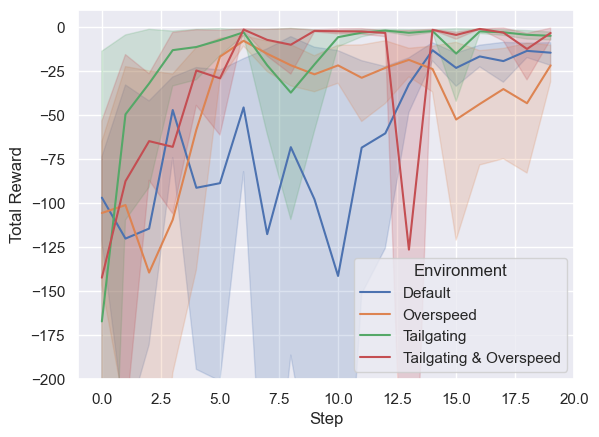

In [51]:
import matplotlib.pyplot as plt

reward_curves = [
    'results/rewards_default.npy',
    'results/rewards_overspeed.npy',
    'results/rewards_tailgating.npy',
    'results/rewards_tailgating_overspeed.npy'
]

env_names = {
    'results/rewards_default.npy': 'Default',
    'results/rewards_overspeed.npy': 'Overspeed',
    'results/rewards_tailgating.npy': 'Tailgating',
    'results/rewards_tailgating_overspeed.npy': 'Tailgating & Overspeed'

}

for reward_curve_file in reward_curves:
    env_name = env_names[reward_curve_file]
    reward_curve = np.load(reward_curve_file)
    data = []
    for i, curve in enumerate(reward_curve):
        for j, reward in enumerate(curve):
            if j > 19:
                break
            data.append({
                'Step': j,
                'Total Reward': reward,
                'run': i,
                'Environment': env_name
            })

    df = pd.DataFrame(data)
    sns.set()
    sns.lineplot(x='Step', y='Total Reward', data=df, style='Environment')

plt.ylim(-200, 10)
plt.xlim(-1, 20)
    